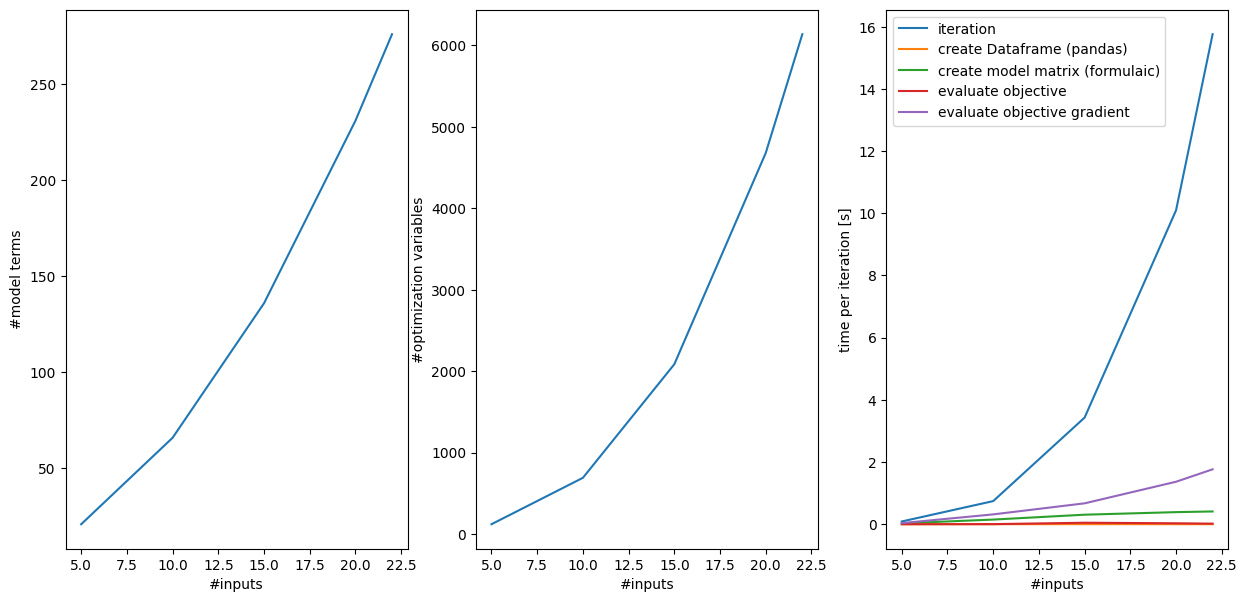

In [2]:
import opti
import numpy as np
import matplotlib.pyplot as plt
from doe import find_local_max_ipopt
import os

tIter = []
tPrep = []
tModelMatrix = []
tObj = []
tGrad = []

nInp = [5, 10, 15, 20, 22]
nModelTerms = []
nOptVar = []

for n in nInp:
    problem = opti.Problem(
        inputs = [opti.Continuous(f"x{i+1}", [0,1]) for i in range(n)],
        outputs = [opti.Continuous("y")],
        constraints= [opti.LinearEquality(names=[f"x{i+1}" for i in range(n)], rhs=1)],
    )

    res = find_local_max_ipopt(problem=problem, model_type="fully-quadratic", ipopt_options={"maxiter":10})

    tPrep.append(np.mean(np.loadtxt("objPrep.txt")) + np.mean(np.loadtxt("gradPrep.txt")))
    tModelMatrix.append(np.mean(np.loadtxt("objModelMatrix.txt")) + np.mean(np.loadtxt("gradModelMatrix.txt")))
    tObj.append(np.mean(np.loadtxt("objEval.txt", delimiter=" ")))
    tGrad.append(np.mean(np.loadtxt("gradEval.txt", delimiter=" ")))

    os.remove("objPrep.txt")
    os.remove("objModelMatrix.txt")
    os.remove("objEval.txt")
    os.remove("gradPrep.txt")
    os.remove("gradModelMatrix.txt")
    os.remove("gradEval.txt")


tIter = np.loadtxt("cyipoptTotal.txt", delimiter=" ") / 10
nOptVar = np.loadtxt("optVars.txt", delimiter=" ")
nModelTerms = np.loadtxt("modelTerms.txt", delimiter=" ")
tPrep = np.array(tPrep)
tModelMatrix = np.array(tModelMatrix)
tObj = np.array(tObj)
tGrad = np.array(tGrad)

os.remove("cyipoptTotal.txt")
os.remove("optVars.txt")
os.remove("modelTerms.txt")    


fig, axs = plt.subplots(1,3, figsize=(15,7))

axs[0].plot(nInp, nModelTerms)
axs[0].set_ylabel("#model terms")
axs[0].set_xlabel("#inputs")

axs[1].plot(nInp, nOptVar)
axs[1].set_ylabel("#optimization variables")
axs[1].set_xlabel("#inputs")

axs[2].plot(nInp, tIter, label="iteration")
axs[2].plot(nInp, tPrep, label="create Dataframe (pandas)")
axs[2].plot(nInp, tModelMatrix, label="create model matrix (formulaic)")
axs[2].plot(nInp, tObj, label="evaluate objective")
axs[2].plot(nInp, tGrad, label="evaluate objective gradient")
axs[2].set_ylabel("time per iteration [s]")
axs[2].set_xlabel("#inputs")
axs[2].legend()
